# Rainfall Estimates for 2018-19 season

looking for the antecedent to the 2019 rainstorm


## Set up

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11, 4)})

## Importing data from MH weather station

CSV contains rain data from Oct 1 2018 to Feb 27 2019

Data recorded every 15 minutes

In [98]:
MH_weather_station = pd.read_csv('JerrysMHRain-2019-02-27.csv')
del MH_weather_station['datetime.1']
MH_weather_station.head(3)

,datetime,RainFall,cumulativeRain
0,2018-10-01 00:00:00,0.0,0.0
1,2018-10-01 00:15:00,0.0,0.0
2,2018-10-01 00:30:00,0.0,0.0


In [99]:
MH_weather_station['datetime'] =  pd.to_datetime(MH_weather_station['datetime'])
MH_weather_station.dtypes

datetime          datetime64[ns]
RainFall                 float64
cumulativeRain           float64
dtype: object

In [100]:
MH_weather_station = MH_weather_station[(MH_weather_station['datetime'] > '2019-01-18') & (MH_weather_station['datetime'] <= '2019-02-18')]
MH_weather_station = MH_weather_station.set_index('datetime').cumsum()

## Importing Rhonda's rain data 

CSV contains information from Jan 18 2017 to Jul 12 2019 

Data recorded every 12 minutes

In [18]:
Rhonda_weather_station = pd.read_csv('AVR_weather_thru042817.csv')
Rhonda_weather_station.head()

,Timestamp,Outdoor Temperature,Outdoor Humidity,Dew Point,Heat Index,Wind Chill,Barometric Pressure,Rain,Wind Speed,Wind Average,Peak Wind,Wind Direction,Indoor Temperature,Indoor Humidity
0,1/18/2017 16:06,47.3,90.0,45.0,47.0,41.0,29.23,7.19,15.53,15.5,30.45,180.0,60.2,51.0
1,1/18/2017 16:18,47.3,90.0,45.0,47.0,42.0,29.23,7.21,12.43,16.2,30.45,180.0,60.2,51.0
2,1/18/2017 16:30,47.5,89.0,45.0,48.0,42.0,29.23,7.22,16.16,18.6,30.45,180.0,60.0,51.0
3,1/18/2017 16:42,47.5,90.0,45.0,48.0,41.0,29.21,7.22,21.75,18.0,30.45,180.0,60.2,52.0
4,1/18/2017 16:54,47.5,90.0,45.0,48.0,41.0,29.21,7.23,19.26,16.8,30.45,180.0,60.4,53.0


In [19]:
Rhonda_weather_station['Timestamp'] = pd.to_datetime(Rhonda_weather_station['Timestamp'])
Rhonda_weather_station = Rhonda_weather_station.set_index('Timestamp')

## Importing PRISM data


In [85]:
PRISM_RhondasHill = pd.read_csv('date_rain_prism.csv')
PRISM_RhondasHill.head(3)

,Date,ppt (mm)
0,1/1/1981,1.01
1,1/2/1981,0.00
2,1/3/1981,1.13


In [86]:
PRISM_RhondasHill['Date'] =  pd.to_datetime(PRISM_RhondasHill['Date'])
PRISM_RhondasHill.head()

,Date,ppt (mm)
0,1981-01-01,1.01
1,1981-01-02,0.00
2,1981-01-03,1.13
3,1981-01-04,2.11
4,1981-01-05,0.00


In [95]:
PRISM_RhondasHill = PRISM_RhondasHill[(PRISM_RhondasHill['Date'] > '2019-01-18') & (PRISM_RhondasHill['Date'] <= '2019-02-18')]
PRISM_RhondasHill = PRISM_RhondasHill.set_index('Date').cumsum()

## Plots

Attempting to look for antecedent rainfall.

Comparing all of the datasets to look for holes and to try and get a consistent intensity/precip for the season

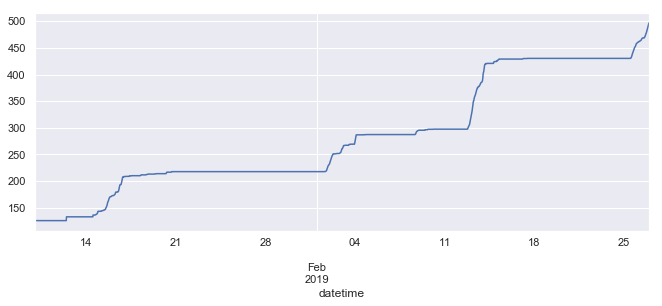

In [20]:
ax01 = MH_weather_station.loc['2019-01-10':'2019-02-26', 'RainFall'].plot()

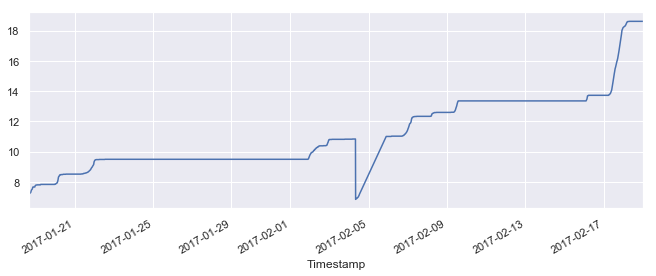

In [21]:
ax = Rhonda_weather_station.loc['2017-01-18':'2017-02-18', 'Rain'].plot()

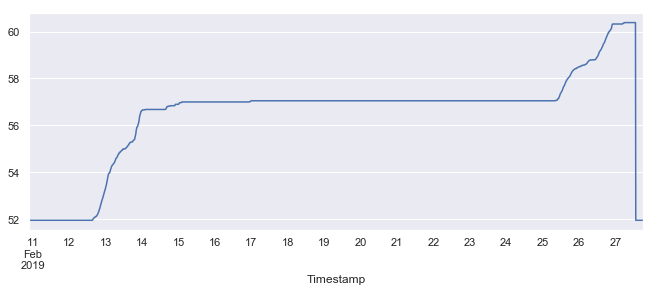

In [22]:
ax2 = Rhonda_weather_station.loc['2019-02-01':'2019-03-18', 'Rain'].plot()

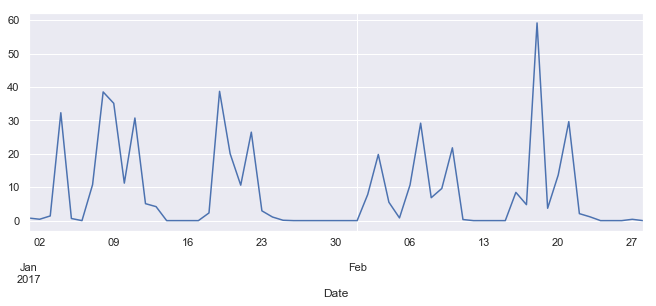

In [23]:
ax001 = PRISM_RhondasHill.loc['2017-01-01':'2017-02-28', 'ppt (mm)'].plot()

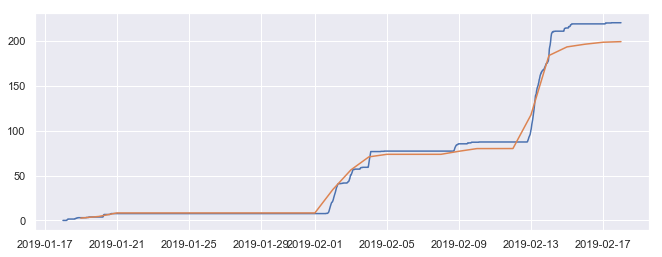

In [102]:
fig, ax = plt.subplots()
ax.plot(MH_weather_station.loc['2019-01-10':'2019-02-26', 'RainFall'])
ax.plot(PRISM_RhondasHill)